In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/abalone-dataset/abalone.csv


In [2]:
def precision_hesapla(class_id,TP, FP, TN, FN):
    sonuc=0
    
    for i in range(0,len(class_id)):
        if TP[i]==0 or FP[i]==0:
            TP[i]=0.00000000001
            FP[i]=0.00000000001
        sonuc+=(TP[i]/(TP[i]+FP[i]))
        
    sonuc=sonuc/len(class_id)
    return sonuc

def recall_hesapla(class_id,TP, FP, TN, FN):
    sonuc=0
    for i in range(0,len(class_id)):
        sonuc+=(TP[i]/(TP[i]+FN[i]))
       
    sonuc=sonuc/len(class_id)
    return sonuc
def accuracy_hesapla(class_id,TP, FP, TN, FN):
    sonuc=0
    for i in range(0,len(class_id)):
        sonuc+=((TP[i]+TN[i])/(TP[i]+FP[i]+TN[i]+FN[i]))
        
    sonuc=sonuc/len(class_id)
    return sonuc
def specificity_hesapla(class_id,TP, FP, TN, FN):
    sonuc=0
    for i in range(0,len(class_id)):
        sonuc+=(TN[i]/(FP[i]+TN[i]))
        
    sonuc=sonuc/len(class_id)
    return sonuc
def NPV_hesapla(class_id,TP, FP, TN, FN):
    sonuc=0
    for i in range(0,len(class_id)):
        sonuc+=(TN[i]/(TN[i]+FN[i]))
        
    sonuc=sonuc/len(class_id)
    return sonuc
def perf_measure(y_actual, y_pred):
    class_id = set(y_actual).union(set(y_pred))
    TP = []
    FP = []
    TN = []
    FN = []

    for index ,_id in enumerate(class_id):
        TP.append(0)
        FP.append(0)
        TN.append(0)
        FN.append(0)
        for i in range(len(y_pred)):
            if y_actual[i] == y_pred[i] == _id:
                TP[index] += 1
            if y_pred[i] == _id and y_actual[i] != y_pred[i]:
                FP[index] += 1
            if y_actual[i] == y_pred[i] != _id:
                TN[index] += 1
            if y_pred[i] != _id and y_actual[i] != y_pred[i]:
                FN[index] += 1


    return class_id,TP, FP, TN, FN


In [3]:
def yenimetot(y_test,y_score):
    from sklearn.preprocessing import label_binarize
    from sklearn.metrics import roc_curve, auc
    y_test = label_binarize(y_test, classes=[2,0,1])
    y_score = label_binarize(y_score, classes=[2,0,1])
    n_classes = 3
    fpr = dict()
    tpr = dict()
    thr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], thr[i] = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    return roc_auc[1],fpr[1],tpr[1],thr[1]

In [4]:
df=pd.read_csv("../input/abalone-dataset/abalone.csv")

In [5]:
df.columns=['Sex','Length','Diameter','Height','Whole weight', 'Shucked weight','Viscera weight','Shell weight','Rings']
df.sample(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
3665,I,0.575,0.450,0.145,0.8720,0.4675,0.180,0.2170,9
2233,M,0.595,0.475,0.170,1.0965,0.4190,0.229,0.3500,17
3613,F,0.610,0.490,0.170,1.3475,0.7045,0.250,0.3045,11
2055,I,0.465,0.355,0.090,0.4325,0.2005,0.074,0.1275,9
1020,M,0.635,0.525,0.185,1.4065,0.6840,0.300,0.3745,10


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [7]:
df[df.Height == 0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


In [8]:
df = pd.get_dummies(df)
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [9]:
bins = [0,8,10,df['Rings'].max()]
group_names = ['young','medium','old']
df['Rings'] = pd.cut(df['Rings'],bins, labels = group_names)

In [10]:
df.Rings = [ 0 if each == "young" else 1 if each=="medium" else 2 for each in df.Rings]
#dictionary = {'young':0, 'medium':1, 'old':2}
#df['Rings'] = df['Rings'].map(dictionary)

In [11]:
df.Rings.value_counts()

2    1447
0    1407
1    1323
Name: Rings, dtype: int64

In [12]:
x = df.drop(['Rings'], axis = 1)
y = df['Rings'].values

In [13]:
type(y)

numpy.ndarray

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

In [15]:
from sklearn.metrics import classification_report,precision_score,recall_score,f1_score,roc_auc_score,accuracy_score
score_liste=[]
auc_scor=[]
precision_scor=[]
recall_scor=[]
f1_scor=[]
LR_plus=[]
LR_eksi=[]
odd_scor=[]
NPV_scor=[]
youden_scor=[]
specificity_scor=[]
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

KNN Algoritması başarım sonucu:  0.6172248803827751


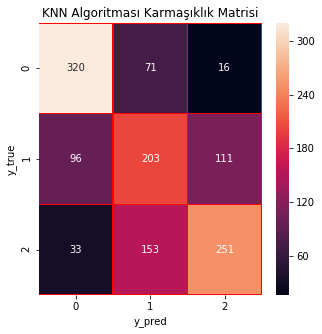

KNN algoritması için sınıflandırma raporu: 
               precision    recall  f1-score   support

           0       0.71      0.79      0.75       407
           1       0.48      0.50      0.49       410
           2       0.66      0.57      0.62       437

    accuracy                           0.62      1254
   macro avg       0.62      0.62      0.62      1254
weighted avg       0.62      0.62      0.62      1254



In [16]:
k=16
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(x_train,y_train)
y_head=knn.predict(x_test)
print("KNN Algoritması başarım sonucu: ",knn.score(x_test,y_test))

from sklearn.metrics import confusion_matrix
cmknn = confusion_matrix(y_test,y_head)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cmknn,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("KNN Algoritması Karmaşıklık Matrisi")
plt.show()
knnauc,knn_fpr,knn_tpr,knn_trr=yenimetot(y_test,y_head)
classid,tn,fp,fn,tp=perf_measure(y_test,y_head)
auc_scor.append(knnauc)
#knn_fpr,knn_tpr,knn_trr=roc_curve(y_test,y_head)
score_liste.append(accuracy_hesapla(classid,tn,fp,fn,tp))
precision_scor.append(precision_hesapla(classid,tn,fp,fn,tp))
recall_scor.append(recall_hesapla(classid,tn,fp,fn,tp))
f1_scor.append(f1_score(y_test,y_head,average='macro'))
NPV_scor.append(NPV_hesapla(classid,tn,fp,fn,tp))
specificity_scor.append(specificity_hesapla(classid,tn,fp,fn,tp))

LR_plus.append((recall_hesapla(classid,tn,fp,fn,tp)/(1-specificity_hesapla(classid,tn,fp,fn,tp))))
LR_eksi.append(((1-recall_hesapla(classid,tn,fp,fn,tp))/specificity_hesapla(classid,tn,fp,fn,tp)))
odd_scor.append(((recall_hesapla(classid,tn,fp,fn,tp)/(1-specificity_hesapla(classid,tn,fp,fn,tp))))/(((1-recall_hesapla(classid,tn,fp,fn,tp))/specificity_hesapla(classid,tn,fp,fn,tp))))
youden_scor.append((recall_hesapla(classid,tn,fp,fn,tp)+specificity_hesapla(classid,tn,fp,fn,tp)-1))
print("KNN algoritması için sınıflandırma raporu: \n",classification_report(y_test,y_head))

Karar Ağaçları Algoritması için başarım sonucu:  0.543859649122807
DTC algoritması için sınıflandırma raporu: 
               precision    recall  f1-score   support

           0       0.65      0.70      0.67       407
           1       0.39      0.38      0.39       410
           2       0.57      0.56      0.57       437

    accuracy                           0.54      1254
   macro avg       0.54      0.54      0.54      1254
weighted avg       0.54      0.54      0.54      1254



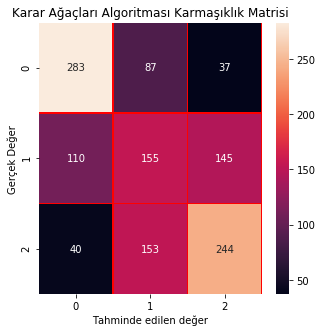

In [17]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_head=dtc.predict(x_test)
print("Karar Ağaçları Algoritması için başarım sonucu: ",dtc.score(x_test,y_test))
dtcauc,dtc_fpr,dtc_tpr,dtc_trr=yenimetot(y_test,y_head)
classid,tn,fp,fn,tp=perf_measure(y_test,y_head)
auc_scor.append(dtcauc)
#dtc_fpr,dtc_tpr,dtc_trr=roc_curve(y_test,y_head)
score_liste.append(accuracy_hesapla(classid,tn,fp,fn,tp))
precision_scor.append(precision_hesapla(classid,tn,fp,fn,tp))
recall_scor.append(recall_hesapla(classid,tn,fp,fn,tp))
f1_scor.append(f1_score(y_test,y_head,average='macro'))
NPV_scor.append(NPV_hesapla(classid,tn,fp,fn,tp))
specificity_scor.append(specificity_hesapla(classid,tn,fp,fn,tp))
TPR=recall_hesapla(classid,tn,fp,fn,tp)
TNR=specificity_hesapla(classid,tn,fp,fn,tp)
FPR=1-TNR
if FPR==0:
    FPR=0.00001
FNR=1-TPR
lreksi=FNR/TNR
lrarti=TPR/FPR
if lreksi==0:
    lreksi=0.00000001
LR_plus.append(TPR/FPR)
LR_eksi.append(FNR/TNR)
odd_scor.append(lrarti/lreksi)
youden_scor.append(TPR+TNR-1)

print("DTC algoritması için sınıflandırma raporu: \n",classification_report(y_test,y_head))

cmdtc = confusion_matrix(y_test,y_head)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cmdtc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("Tahminde edilen değer")
plt.ylabel("Gerçek Değer")
plt.title("Karar Ağaçları Algoritması Karmaşıklık Matrisi")
plt.show()

Rastgele Orman Algoritması başarım sonucu:  0.645933014354067
Rastgele Orman algoritması için sınıflandırma raporu: 
               precision    recall  f1-score   support

           0       0.77      0.78      0.78       407
           1       0.50      0.50      0.50       410
           2       0.66      0.65      0.66       437

    accuracy                           0.65      1254
   macro avg       0.65      0.65      0.65      1254
weighted avg       0.65      0.65      0.65      1254



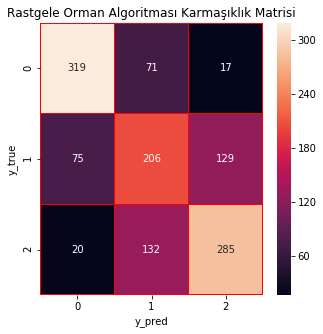

In [18]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=225,random_state=1)
rfc.fit(x_train,y_train)
y_head=rfc.predict(x_test)
print("Rastgele Orman Algoritması başarım sonucu: ",rfc.score(x_test,y_test))
rfcauc,rfc_fpr,rfc_tpr,rfc_trr=yenimetot(y_test,y_head)
classid,tn,fp,fn,tp=perf_measure(y_test,y_head)
auc_scor.append(rfcauc)
#rfc_fpr,rfc_tpr,rfc_trr=roc_curve(y_test,y_head)
score_liste.append(accuracy_hesapla(classid,tn,fp,fn,tp))
precision_scor.append(precision_hesapla(classid,tn,fp,fn,tp))
recall_scor.append(recall_hesapla(classid,tn,fp,fn,tp))
f1_scor.append(f1_score(y_test,y_head,average='macro'))
NPV_scor.append(NPV_hesapla(classid,tn,fp,fn,tp))
specificity_scor.append(specificity_hesapla(classid,tn,fp,fn,tp))
TPR=recall_hesapla(classid,tn,fp,fn,tp)
TNR=specificity_hesapla(classid,tn,fp,fn,tp)
FPR=1-TNR
if FPR==0:
    FPR=0.00001
FNR=1-TPR
lreksi=FNR/TNR
lrarti=TPR/FPR
if lreksi==0:
    lreksi=0.00000001
LR_plus.append(TPR/FPR)
LR_eksi.append(FNR/TNR)
odd_scor.append(lrarti/lreksi)
youden_scor.append(TPR+TNR-1)
print("Rastgele Orman algoritması için sınıflandırma raporu: \n",classification_report(y_test,y_head))

cmrfc = confusion_matrix(y_test,y_head)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cmrfc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Rastgele Orman Algoritması Karmaşıklık Matrisi")
plt.show()

Naive Bayes Algoritması başarım sonucu:  0.5566188197767146
Naive Bayes algoritması için sınıflandırma raporu: 
               precision    recall  f1-score   support

           0       0.67      0.79      0.73       407
           1       0.39      0.36      0.37       410
           2       0.57      0.53      0.55       437

    accuracy                           0.56      1254
   macro avg       0.55      0.56      0.55      1254
weighted avg       0.55      0.56      0.55      1254



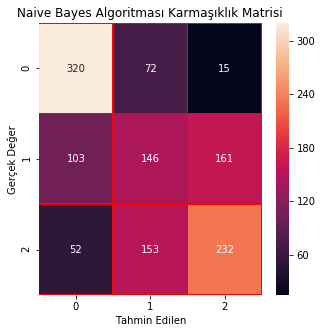

In [19]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
y_head=nb.predict(x_test)
print("Naive Bayes Algoritması başarım sonucu: ",nb.score(x_test,y_test))

nbauc,nb_fpr,nb_tpr,nb_trr=yenimetot(y_test,y_head)
classid,tn,fp,fn,tp=perf_measure(y_test,y_head)
auc_scor.append(nbauc)
#nb_fpr,nb_tpr,nb_trr=roc_curve(y_test,y_head)
score_liste.append(accuracy_hesapla(classid,tn,fp,fn,tp))
precision_scor.append(precision_hesapla(classid,tn,fp,fn,tp))
recall_scor.append(recall_hesapla(classid,tn,fp,fn,tp))
f1_scor.append(f1_score(y_test,y_head,average='macro'))
NPV_scor.append(NPV_hesapla(classid,tn,fp,fn,tp))
specificity_scor.append(specificity_hesapla(classid,tn,fp,fn,tp))
TPR=recall_hesapla(classid,tn,fp,fn,tp)
TNR=specificity_hesapla(classid,tn,fp,fn,tp)
FPR=1-TNR
if FPR==0:
    FPR=0.00001
FNR=1-TPR
lreksi=FNR/TNR
lrarti=TPR/FPR
if lreksi==0:
    lreksi=0.00000001
LR_plus.append(TPR/FPR)
LR_eksi.append(FNR/TNR)
odd_scor.append(lrarti/lreksi)
youden_scor.append(TPR+TNR-1)
print("Naive Bayes algoritması için sınıflandırma raporu: \n",classification_report(y_test,y_head))

cmnb = confusion_matrix(y_test,y_head)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cmnb,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Değer")
plt.title("Naive Bayes Algoritması Karmaşıklık Matrisi")
plt.show()

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic Regresyon Algoritması başarım sonucu:  0.620414673046252
Lojistik Regresyon algoritması için sınıflandırma raporu: 
               precision    recall  f1-score   support

           0       0.66      0.80      0.72       407
           1       0.51      0.36      0.42       410
           2       0.64      0.70      0.67       437

    accuracy                           0.62      1254
   macro avg       0.61      0.62      0.60      1254
weighted avg       0.61      0.62      0.61      1254



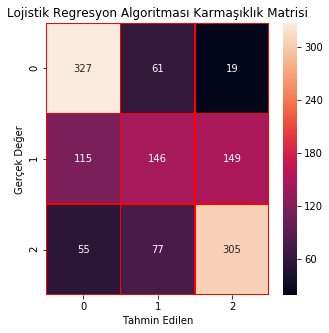

In [20]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_head=lr.predict(x_test)
print("Logistic Regresyon Algoritması başarım sonucu: ",lr.score(x_test,y_test))

lrcauc,lrc_fpr,lrc_tpr,lrc_trr=yenimetot(y_test,y_head)
classid,tn,fp,fn,tp=perf_measure(y_test,y_head)
auc_scor.append(lrcauc)
#lrc_fpr,lrc_tpr,lrc_trr=roc_curve(y_test,y_head)
score_liste.append(accuracy_hesapla(classid,tn,fp,fn,tp))
precision_scor.append(precision_hesapla(classid,tn,fp,fn,tp))
recall_scor.append(recall_hesapla(classid,tn,fp,fn,tp))
f1_scor.append(f1_score(y_test,y_head,average='macro'))
NPV_scor.append(NPV_hesapla(classid,tn,fp,fn,tp))
specificity_scor.append(specificity_hesapla(classid,tn,fp,fn,tp))
TPR=recall_hesapla(classid,tn,fp,fn,tp)
TNR=specificity_hesapla(classid,tn,fp,fn,tp)
FPR=1-TNR
if FPR==0:
    FPR=0.00001
FNR=1-TPR
lreksi=FNR/TNR
lrarti=TPR/FPR
if lreksi==0:
    lreksi=0.00000001
LR_plus.append(TPR/FPR)
LR_eksi.append(FNR/TNR)
odd_scor.append(lrarti/lreksi)
youden_scor.append(TPR+TNR-1)
print("Lojistik Regresyon algoritması için sınıflandırma raporu: \n",classification_report(y_test,y_head))

cmlr = confusion_matrix(y_test,y_head)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cmlr,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Değer")
plt.title("Lojistik Regresyon Algoritması Karmaşıklık Matrisi")
plt.show()

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Destek Vektör Makineleri Algoritması başarım sonucu:  0.5901116427432217
Destek Vektör Makineleri algoritması için sınıflandırma raporu: 
               precision    recall  f1-score   support

           0       0.72      0.73      0.72       407
           1       0.43      0.34      0.38       410
           2       0.59      0.69      0.64       437

    accuracy                           0.59      1254
   macro avg       0.58      0.59      0.58      1254
weighted avg       0.58      0.59      0.58      1254



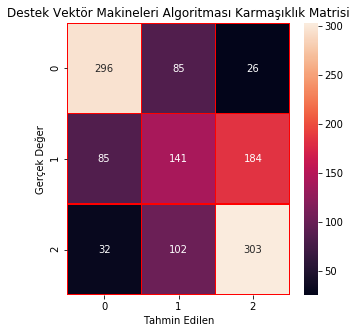

In [21]:
from sklearn.svm import SVC
svc=SVC(random_state=1)
svc.fit(x_train,y_train)
y_head=svc.predict(x_test)
print("Destek Vektör Makineleri Algoritması başarım sonucu: ",svc.score(x_test,y_test))

svcauc,svc_fpr,svc_tpr,svc_trr=yenimetot(y_test,y_head)
classid,tn,fp,fn,tp=perf_measure(y_test,y_head)
auc_scor.append(svcauc)
#svc_fpr,svc_tpr,svc_trr=roc_curve(y_test,y_head)
score_liste.append(accuracy_hesapla(classid,tn,fp,fn,tp))
precision_scor.append(precision_hesapla(classid,tn,fp,fn,tp))
recall_scor.append(recall_hesapla(classid,tn,fp,fn,tp))
f1_scor.append(f1_score(y_test,y_head,average='macro'))
NPV_scor.append(NPV_hesapla(classid,tn,fp,fn,tp))
specificity_scor.append(specificity_hesapla(classid,tn,fp,fn,tp))
TPR=recall_hesapla(classid,tn,fp,fn,tp)
TNR=specificity_hesapla(classid,tn,fp,fn,tp)
FPR=1-TNR
if FPR==0:
    FPR=0.00001
FNR=1-TPR
lreksi=FNR/TNR
lrarti=TPR/FPR
if lreksi==0:
    lreksi=0.00000001
LR_plus.append(TPR/FPR)
LR_eksi.append(FNR/TNR)
odd_scor.append(lrarti/lreksi)
youden_scor.append(TPR+TNR-1)
print("Destek Vektör Makineleri algoritması için sınıflandırma raporu: \n",classification_report(y_test,y_head))

cmsvc = confusion_matrix(y_test,y_head)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cmsvc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Değer")
plt.title("Destek Vektör Makineleri Algoritması Karmaşıklık Matrisi")
plt.show()

Gradient Boosting Classifier Algoritması başarım sonucu:  0.6371610845295056
Gradient Boosting Classifier algoritması için sınıflandırma raporu: 
               precision    recall  f1-score   support

           0       0.73      0.79      0.76       407
           1       0.50      0.45      0.48       410
           2       0.65      0.67      0.66       437

    accuracy                           0.64      1254
   macro avg       0.63      0.64      0.63      1254
weighted avg       0.63      0.64      0.63      1254



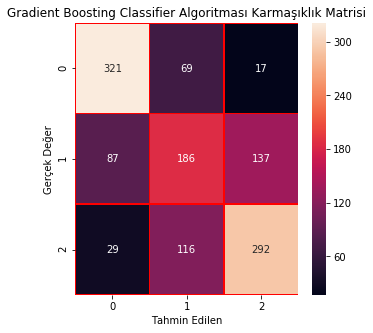

In [22]:
gfc=GradientBoostingClassifier(n_estimators= 1000, max_leaf_nodes= 4, max_depth=None,random_state= 2,min_samples_split= 5)
gfc.fit(x_train,y_train)
y_head=gfc.predict(x_test)
print("Gradient Boosting Classifier Algoritması başarım sonucu: ",gfc.score(x_test,y_test))
gfcauc,gfc_fpr,gfc_tpr,gfc_trr=yenimetot(y_test,y_head)
classid,tn,fp,fn,tp=perf_measure(y_test,y_head)
auc_scor.append(gfcauc)
#gfc_fpr,gfc_tpr,gfc_trr=roc_curve(y_test,y_head)
score_liste.append(accuracy_hesapla(classid,tn,fp,fn,tp))
precision_scor.append(precision_hesapla(classid,tn,fp,fn,tp))
recall_scor.append(recall_hesapla(classid,tn,fp,fn,tp))
f1_scor.append(f1_score(y_test,y_head,average='macro'))
NPV_scor.append(NPV_hesapla(classid,tn,fp,fn,tp))
specificity_scor.append(specificity_hesapla(classid,tn,fp,fn,tp))
TPR=recall_hesapla(classid,tn,fp,fn,tp)
TNR=specificity_hesapla(classid,tn,fp,fn,tp)
FPR=1-TNR
if FPR==0:
    FPR=0.00001
FNR=1-TPR
lreksi=FNR/TNR
lrarti=TPR/FPR
if lreksi==0:
    lreksi=0.00000001
LR_plus.append(TPR/FPR)
LR_eksi.append(FNR/TNR)
odd_scor.append(lrarti/lreksi)
youden_scor.append(TPR+TNR-1)
print("Gradient Boosting Classifier algoritması için sınıflandırma raporu: \n",classification_report(y_test,y_head))

cmgfc = confusion_matrix(y_test,y_head)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cmgfc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Değer")
plt.title("Gradient Boosting Classifier Algoritması Karmaşıklık Matrisi")
plt.show()

AdaBoosting Classifier Algoritması başarım sonucu:  0.5996810207336523
AdaBoosting Classifier algoritması için sınıflandırma raporu: 
               precision    recall  f1-score   support

           0       0.71      0.79      0.75       407
           1       0.45      0.47      0.46       410
           2       0.64      0.54      0.59       437

    accuracy                           0.60      1254
   macro avg       0.60      0.60      0.60      1254
weighted avg       0.60      0.60      0.60      1254



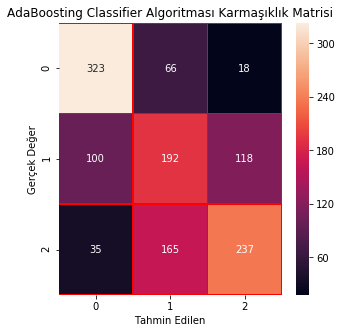

In [23]:
abc=AdaBoostClassifier(n_estimators=100, random_state=0)
abc.fit(x_train,y_train)
y_head=abc.predict(x_test)
print("AdaBoosting Classifier Algoritması başarım sonucu: ",abc.score(x_test,y_test))

abcauc,abc_fpr,abc_tpr,abc_trr=yenimetot(y_test,y_head)
classid,tn,fp,fn,tp=perf_measure(y_test,y_head)
auc_scor.append(abcauc)
#abc_fpr,abc_tpr,abc_trr=roc_curve(y_test,y_head)
score_liste.append(accuracy_hesapla(classid,tn,fp,fn,tp))
precision_scor.append(precision_hesapla(classid,tn,fp,fn,tp))
recall_scor.append(recall_hesapla(classid,tn,fp,fn,tp))
f1_scor.append(f1_score(y_test,y_head,average='macro'))
NPV_scor.append(NPV_hesapla(classid,tn,fp,fn,tp))
specificity_scor.append(specificity_hesapla(classid,tn,fp,fn,tp))
TPR=recall_hesapla(classid,tn,fp,fn,tp)
TNR=specificity_hesapla(classid,tn,fp,fn,tp)
FPR=1-TNR
if FPR==0:
    FPR=0.00001
FNR=1-TPR
lreksi=FNR/TNR
lrarti=TPR/FPR
if lreksi==0:
    lreksi=0.00000001
LR_plus.append(TPR/FPR)
LR_eksi.append(FNR/TNR)
odd_scor.append(lrarti/lreksi)
youden_scor.append(TPR+TNR-1)
print("AdaBoosting Classifier algoritması için sınıflandırma raporu: \n",classification_report(y_test,y_head))

cmabc = confusion_matrix(y_test,y_head)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cmabc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Değer")
plt.title("AdaBoosting Classifier Algoritması Karmaşıklık Matrisi")
plt.show()

Yapay Sinir Ağları Algoritması başarım sonucu:  0.620414673046252
Yapay Sinir Ağları algoritması için sınıflandırma raporu: 
               precision    recall  f1-score   support

           0       0.70      0.77      0.73       407
           1       0.48      0.36      0.41       410
           2       0.64      0.73      0.68       437

    accuracy                           0.62      1254
   macro avg       0.60      0.62      0.61      1254
weighted avg       0.61      0.62      0.61      1254



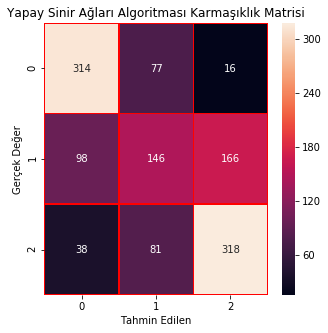

In [24]:
ysa=MLPClassifier(alpha=1, max_iter=1000)
ysa.fit(x_train,y_train)
y_head=ysa.predict(x_test)
print("Yapay Sinir Ağları Algoritması başarım sonucu: ",ysa.score(x_test,y_test))

ysaauc,ysa_fpr,ysa_tpr,ysa_trr=yenimetot(y_test,y_head)
classid,tn,fp,fn,tp=perf_measure(y_test,y_head)
auc_scor.append(ysaauc)
#ysa_fpr,ysa_tpr,ysa_trr=roc_curve(y_test,y_head)
score_liste.append(accuracy_hesapla(classid,tn,fp,fn,tp))
precision_scor.append(precision_hesapla(classid,tn,fp,fn,tp))
recall_scor.append(recall_hesapla(classid,tn,fp,fn,tp))
f1_scor.append(f1_score(y_test,y_head,average='macro'))
NPV_scor.append(NPV_hesapla(classid,tn,fp,fn,tp))
specificity_scor.append(specificity_hesapla(classid,tn,fp,fn,tp))
TPR=recall_hesapla(classid,tn,fp,fn,tp)
TNR=specificity_hesapla(classid,tn,fp,fn,tp)
FPR=1-TNR
if FPR==0:
    FPR=0.00001
FNR=1-TPR
lreksi=FNR/TNR
lrarti=TPR/FPR
if lreksi==0:
    lreksi=0.00000001
LR_plus.append(TPR/FPR)
LR_eksi.append(FNR/TNR)
odd_scor.append(lrarti/lreksi)
youden_scor.append(TPR+TNR-1)
print("Yapay Sinir Ağları algoritması için sınıflandırma raporu: \n",classification_report(y_test,y_head))

cmysa = confusion_matrix(y_test,y_head)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cmysa,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Değer")
plt.title("Yapay Sinir Ağları Algoritması Karmaşıklık Matrisi")
plt.show()

In [25]:
algo_liste=["KNN","Decision Tree","Random Forest","Naive Bayes","Linear Regression","Support Vector Machine","Gradient Boosting Classifier","AdaBoosting Classifier","Neural Network"]
score={"algo_list":algo_liste,"score_liste":score_liste,"precision":precision_scor,"recall":recall_scor,"f1_score":f1_scor,"AUC":auc_scor,"LR+":LR_plus,"LR-":LR_eksi,"ODD":odd_scor,"YOUDEN":youden_scor,"Specificity":specificity_scor}

In [26]:
df=pd.DataFrame(score)
df

,algo_list,score_liste,precision,recall,f1_score,AUC,LR+,LR-,ODD,YOUDEN,Specificity
0,KNN,0.617225,0.617375,0.444910,0.616227,0.816969,1.911083,0.723532,2.641324,0.212105,0.767195
1,Decision Tree,0.543860,0.539585,0.368184,0.541457,0.759118,1.255629,0.893944,1.404594,0.074957,0.706773
2,Random Forest,0.645933,0.645151,0.475749,0.645612,0.835812,2.260981,0.663960,3.405298,0.265332,0.789583
3,Naive Bayes,0.556619,0.545281,0.376331,0.549539,0.801621,1.321193,0.872072,1.515005,0.091489,0.715158
4,Linear Regression,0.620415,0.605617,0.438598,0.604843,0.801366,1.840108,0.737091,2.496446,0.200243,0.761646
5,Support Vector Machine,0.590112,0.579076,0.409196,0.580653,0.794569,1.592109,0.795177,2.002208,0.152181,0.742985
6,Gradient Boosting Classifier,0.637161,0.630203,0.462223,0.632786,0.825872,2.100709,0.689486,3.046777,0.242191,0.779968
7,AdaBoosting Classifier,0.599681,0.598177,0.425279,0.597663,0.817113,1.723391,0.763007,2.258683,0.178510,0.753231
8,Neural Network,0.620415,0.604680,0.438128,0.606838,0.805466,1.850841,0.736126,2.514298,0.201410,0.763281


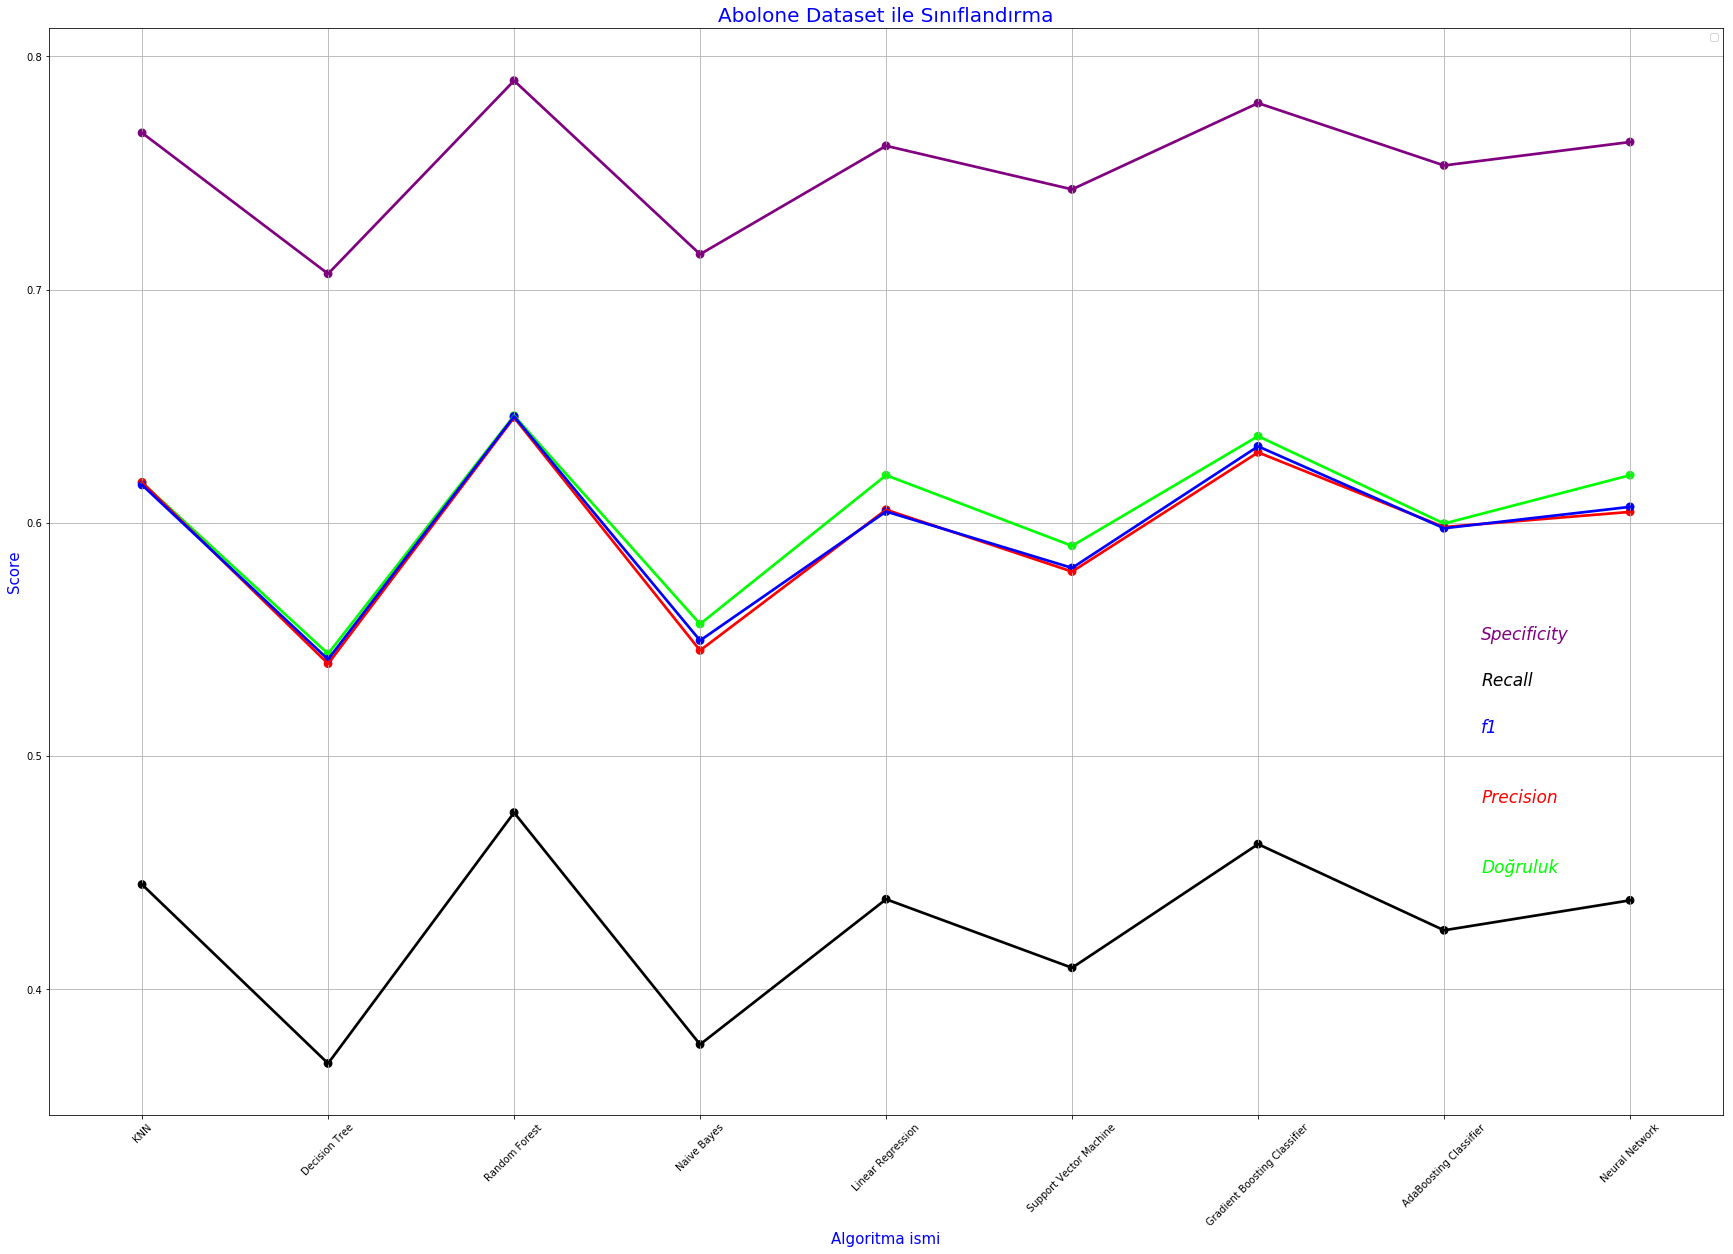

In [27]:
f,ax1 = plt.subplots(figsize =(30,20))
sns.pointplot(x=df['algo_list'], y=df['score_liste'],data=df,color='lime',alpha=0.8,label="score_liste")
sns.pointplot(x=df['algo_list'], y=df['precision'],data=df,color='red',alpha=0.8,label="precision")
sns.pointplot(x=df['algo_list'], y=df['recall'],data=df,color='black',alpha=0.8,label="recall")
sns.pointplot(x=df['algo_list'], y=df['f1_score'],data=df,color='blue',alpha=0.8,label="f1_score")
sns.pointplot(x=df['algo_list'], y=df['Specificity'],data=df,color='purple',alpha=0.8,label="Specificity")

plt.text(7.2,0.45,'Doğruluk',color='lime',fontsize = 17,style = 'italic')
plt.text(7.2,0.48,'Precision',color='red',fontsize = 17,style = 'italic')
plt.text(7.2,0.51,'f1',color='blue',fontsize = 17,style = 'italic')
plt.text(7.2,0.53,'Recall',color='black',fontsize = 17,style = 'italic')
plt.text(7.2,0.55,'Specificity',color='purple',fontsize = 17,style = 'italic')



plt.xlabel('Algoritma ismi',fontsize = 15,color='blue')
plt.ylabel('Score',fontsize = 15,color='blue')
plt.xticks(rotation= 45)
plt.title('Abolone Dataset ile Sınıflandırma',fontsize = 20,color='blue')
plt.grid()
plt.legend()
plt.show()

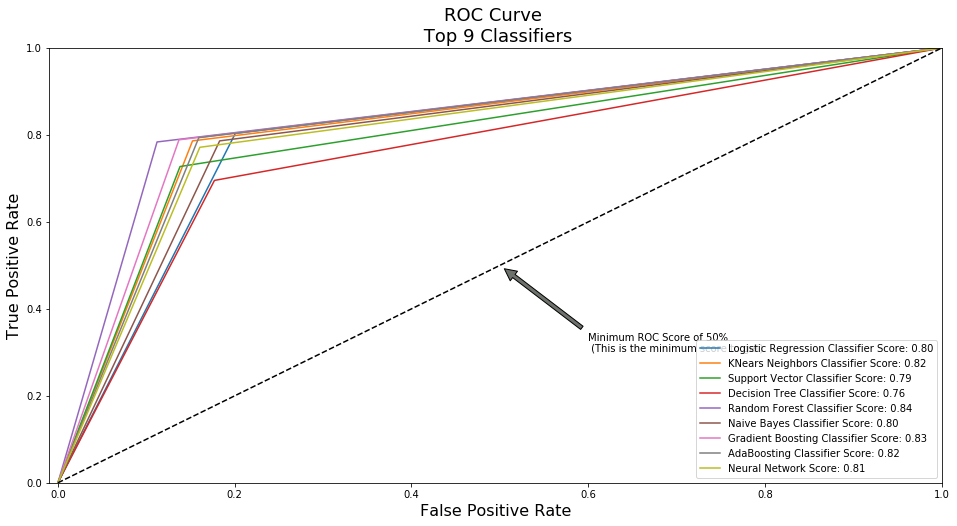

In [28]:
def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr,rfc_fpr,rfc_tpr,nb_fpr,nb_tpr,gbc_fpr,gbc_tpr,abc_fpr,abc_tpr,ysa_fpr,ysa_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 9 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: %0.2f'% lrcauc)
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: %0.2f'% knnauc)
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: %0.2f'% svcauc)
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: %0.2f'% dtcauc)
    plt.plot(rfc_fpr, rfc_tpr, label='Random Forest Classifier Score: %0.2f'% rfcauc)
    plt.plot(nb_fpr, nb_tpr, label='Naive Bayes Classifier Score: %0.2f'% nbauc)
    plt.plot(gbc_fpr, gbc_tpr, label='Gradient Boosting Classifier Score: %0.2f'% gfcauc)
    plt.plot(abc_fpr, abc_tpr, label='AdaBoosting Classifier Score: %0.2f'% abcauc)
    plt.plot(ysa_fpr, ysa_tpr, label='Neural Network Score: %0.2f'% ysaauc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(lrc_fpr, lrc_tpr, knn_fpr, knn_tpr, svc_fpr, svc_tpr, dtc_fpr, dtc_tpr,rfc_fpr,rfc_tpr,nb_fpr,nb_tpr,gfc_fpr,gfc_tpr,abc_fpr,abc_tpr,ysa_fpr,ysa_tpr)
plt.show()